In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading Dataset
df = pd.read_csv('/kaggle/input/covid19-dataset/Covid Data.csv', low_memory=False)

In [4]:
# Display top 1 records
df.head(1)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97


In [5]:
# Display top 2 records
df.head(2)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97


In [6]:
# Display top 3 records
df.head(3)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2


In [7]:
# Display top 5 records
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [8]:
# Display top 10 records
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [9]:
# Display last 5 records
df.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [10]:
# Display last 7 records
df.tail(7)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048568,1,13,2,1,9999-99-99,97,2,47,97,1,...,2,2,2,2,2,2,2,2,7,97
1048569,1,13,1,2,9999-99-99,2,2,56,2,1,...,2,2,2,2,2,2,2,2,7,2
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [11]:
# Display last 3 records
df.tail(3)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [12]:
# Display last 1 records
df.tail(1)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [13]:
# Get the total number of records & attributes
df.shape

(1048575, 21)

In [14]:
# Getting List of column
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [15]:
# Getting more info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

**************************************** Advance EDA **************************************************


![EDA](https://in.images.search.yahoo.com/search/images;_ylt=AwrPpRI.SLlkVOoPHBe7HAx.;_ylu=Y29sbwNzZzMEcG9zAzEEdnRpZAMEc2VjA3Nj?p=eda+data+analysis+jpg&fr=mcafee#id=12&iurl=https%3A%2F%2Fdeeptechbytes.com%2Fwp-content%2Fuploads%2F2021%2F02%2FExploratory-Data-Analysis.jpg&action=click)

In [16]:
# Check for Null Values ========= does not hold an empty string or an empty list
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [17]:
# Check for Duplicate values
df[df.duplicated()]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
19,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
35,2,1,2,1,9999-99-99,97,2,45,97,2,...,2,2,2,2,2,2,2,2,3,97
62,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,7,2
63,2,1,2,1,9999-99-99,97,2,33,97,2,...,2,2,2,2,2,2,2,2,7,97
75,2,1,1,1,9999-99-99,97,2,24,2,2,...,2,2,2,2,2,2,2,2,7,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048556,2,13,2,1,9999-99-99,97,2,31,97,2,...,2,2,2,2,2,2,2,2,7,97
1048558,1,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048566,2,13,2,1,9999-99-99,97,2,24,97,2,...,1,2,2,2,2,2,2,2,7,97
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97


out of 104857558 % ICU


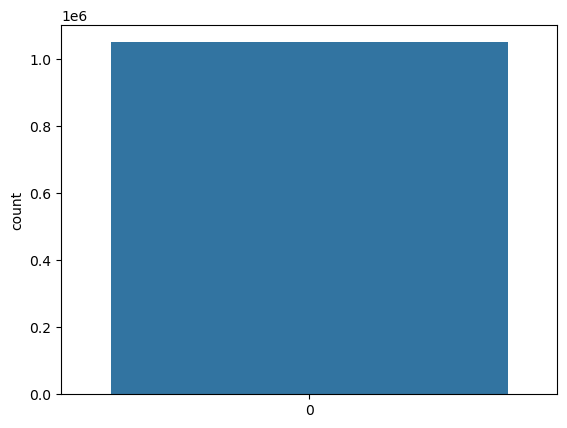

In [18]:
#Visualizing Categorical Data 
#Data Explor
#Data Cleaning and Preprocessing
#Communication Finding 

# Medical Column
sns.countplot(df['MEDICAL_UNIT'])

medical_unit = round (df['MEDICAL_UNIT'].value_counts().values[0]/1048575*100)

# Observation
print('out of 1048575{} % ICU'.format(medical_unit))

In [ ]:
#seaborn >> it provides a high-level interface 
           

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64
1    80.923539
2    19.076461
Name: PATIENT_TYPE, dtype: float64


<Axes: ylabel='count'>

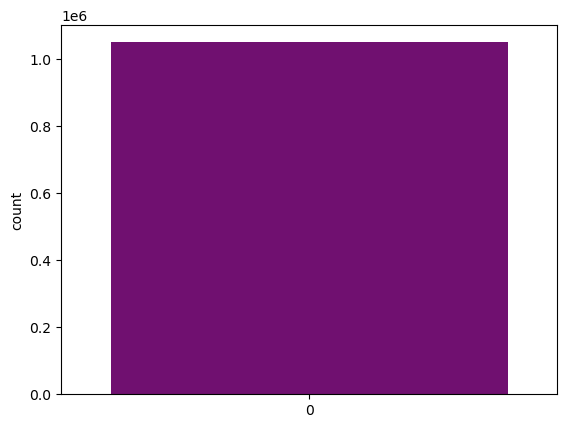

In [59]:
#Visualizing Categorical Data 
#Data Explor
#Data Cleaning and Preprocessing
#Communication Finding 

print(df['PATIENT_TYPE'].value_counts())
print((df['PATIENT_TYPE'].value_counts()/1048575)*100)

sns.countplot(df['PATIENT_TYPE'],color='purple')

<Axes: xlabel='ICU', ylabel='count'>

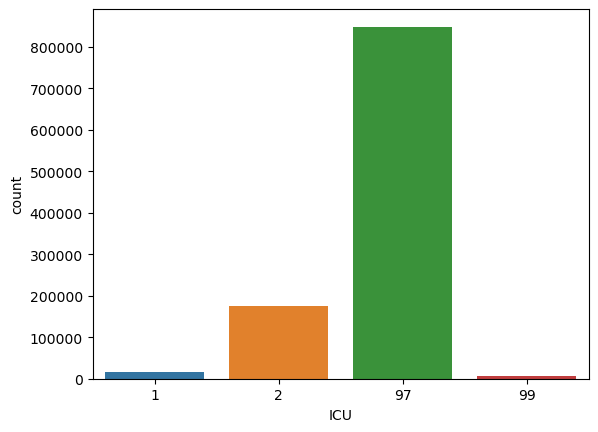

In [20]:
#Visualizing Categorical Data 
#Data Explor
#Data Cleaning and Preprocessing
#Communication Finding 

sns.countplot(x='ICU', data=df)

<Axes: xlabel='MEDICAL_UNIT', ylabel='Density'>

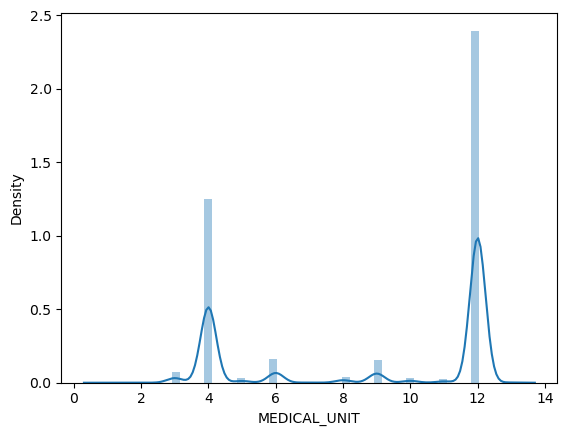

In [21]:
#Visualizing Categorical Data 
#Data Explor
#Data Cleaning and Preprocessing
#Communication Finding 

sns.distplot(df['MEDICAL_UNIT'])

<Axes: xlabel='CLASIFFICATION_FINAL', ylabel='Density'>

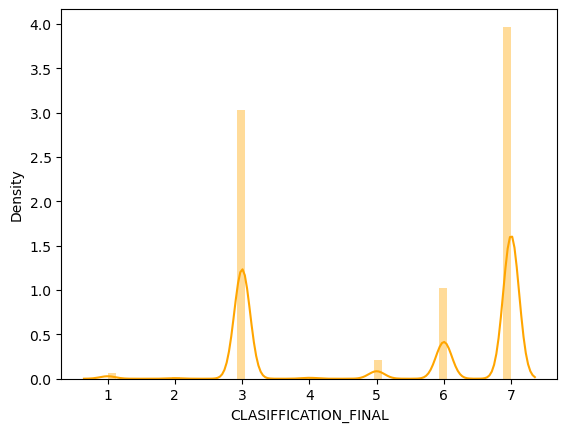

In [56]:
#Data Preprocessing
#Distribution Visualization
#Identifying Multimodal Distributions

sns.distplot(df['CLASIFFICATION_FINAL'],color='orange')

<Axes: >

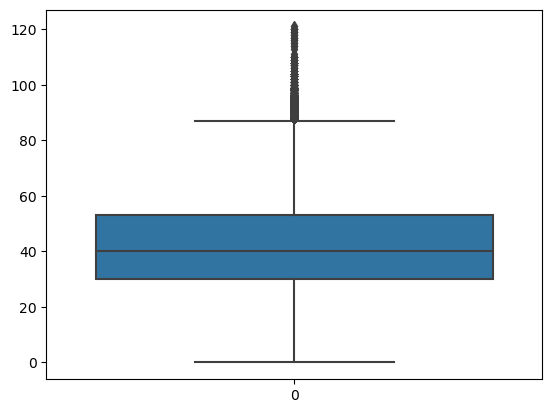

In [23]:

#Summary of Data Distribution
#Comparison of Distributions
#Insights for Decision Making
#Data Preprocessing 


#boxplot for Age
sns.boxplot(df['AGE'])

<Axes: >

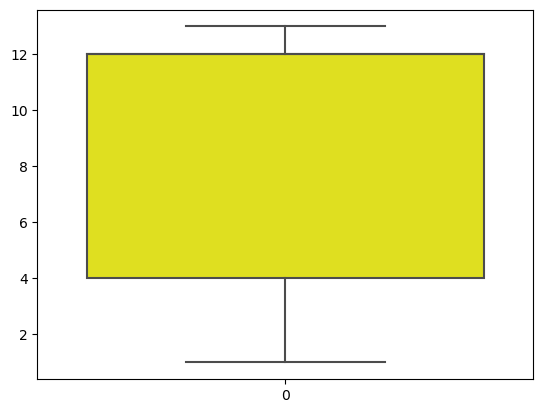

In [24]:

#Summary of Data Distribution
#Comparison of Distributions
#Insights for Decision Making
#Data Preprocessing 

#boxplot for Medical Unit

sns.boxplot(df['MEDICAL_UNIT'],color='yellow')

<Axes: >

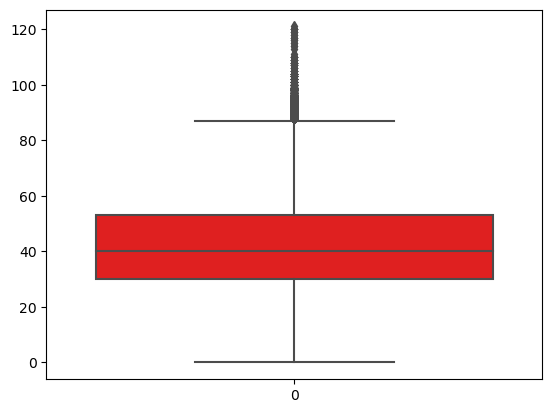

In [25]:
#Summary of Data Distribution
#Comparison of Distributions
#Insights for Decision Making
#Data Preprocessing 

#boxplot for Age 


sns.boxplot(df['AGE'],color='red')

<Axes: xlabel='AGE', ylabel='count'>

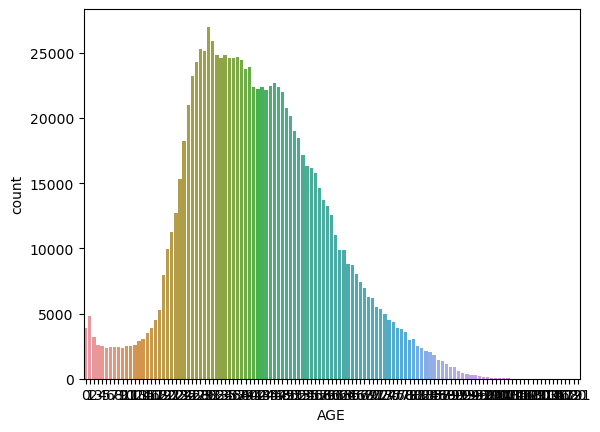

In [26]:
#Visualizing Categorical Data 
#Data Explor
#Data Cleaning and Preprocessing
#Communication Finding 


sns.countplot(x='AGE', data=df)

<Axes: xlabel='ASTHMA', ylabel='count'>

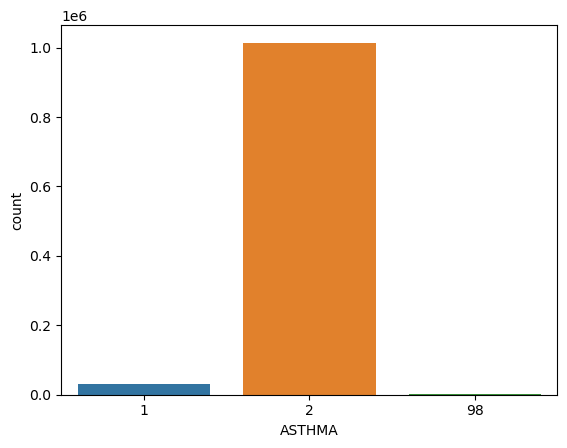

In [27]:
#Visualizing Categorical Data 
#Data Explor
#Data Cleaning and Preprocessing
#Communication Finding 


sns.countplot(x='ASTHMA', data=df)

<Axes: >

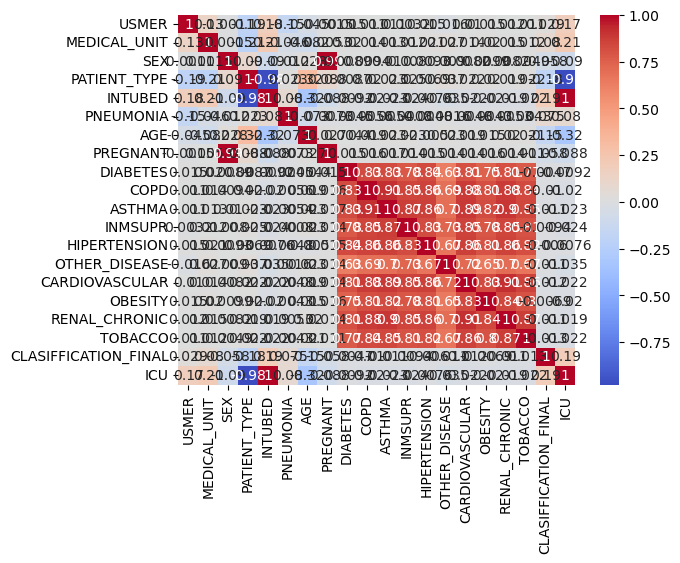

In [28]:
#Data Exploration and EDA
#Visualizing Correlations
#Identifying Patterns 
#Identifying Relationships
#Customization and Visualization
#Data Preprocessing


correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<Axes: >

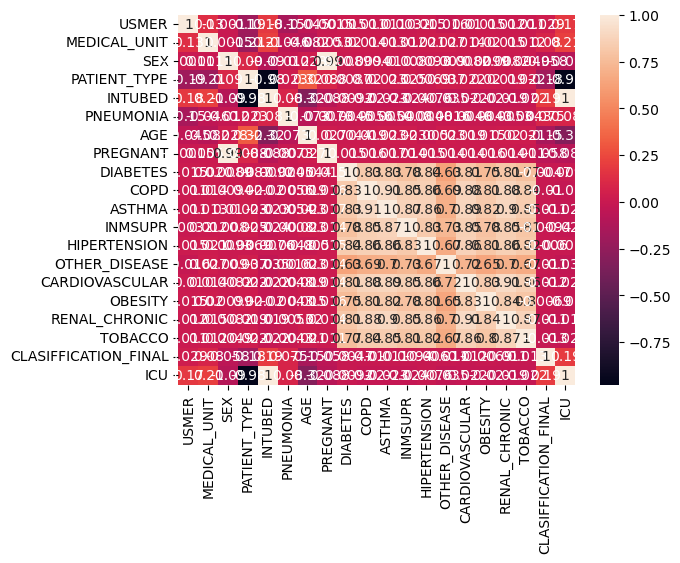

In [29]:
#Data Exploration and EDA
#Visualizing Correlations
#Identifying Patterns 
#Identifying Relationships
#Customization and Visualization
#Data Preprocessing


sns.heatmap(df.corr(),annot=True)

<Axes: >

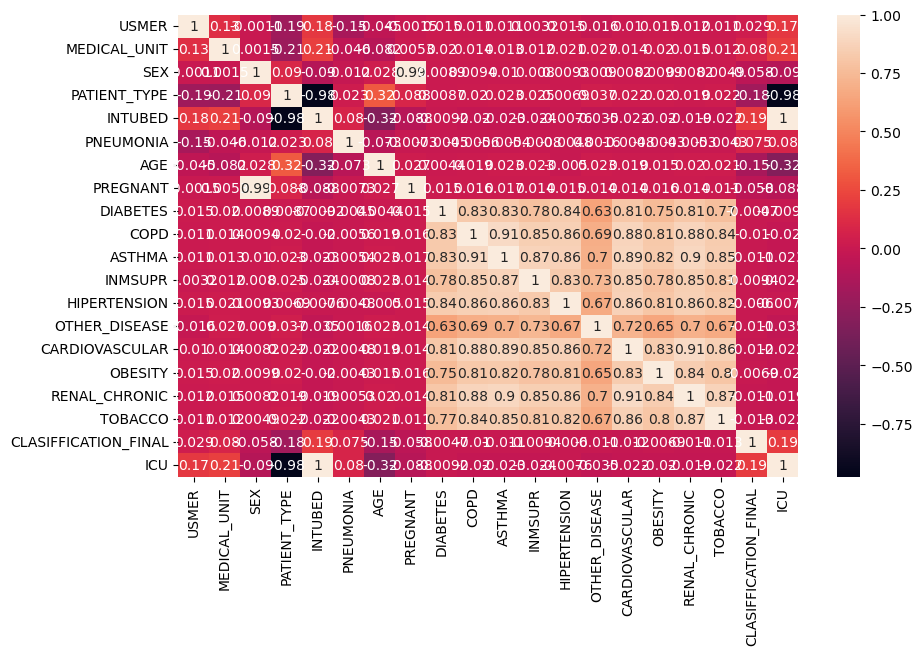

In [30]:
#Data Exploration and EDA
#Visualizing Correlations
#Identifying Patterns 
#Identifying Relationships
#Customization and Visualization
#Data Preprocessing


plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

<Axes: >

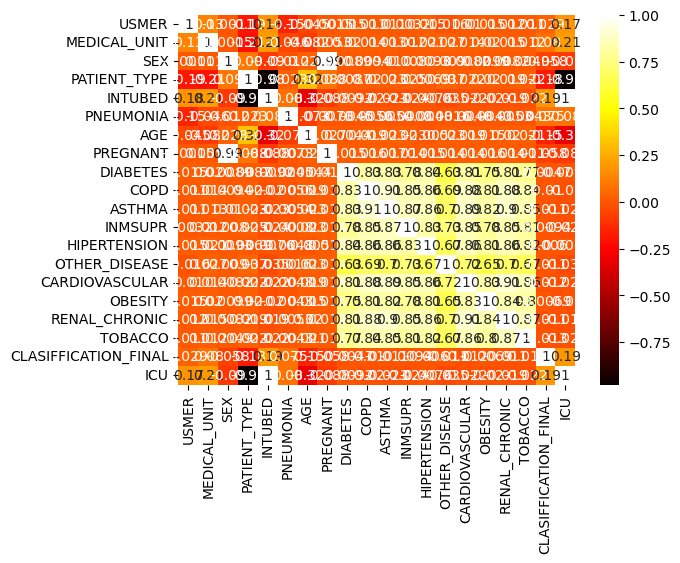

In [31]:
#Data Exploration and EDA
#Visualizing Correlations
#Identifying Patterns 
#Identifying Relationships
#Customization and Visualization
#Data Preprocessing

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='hot')

<Axes: >

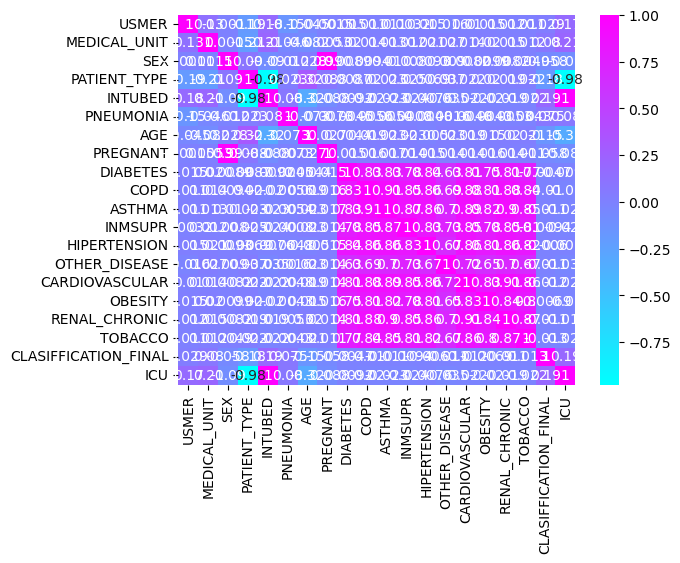

In [32]:
#Data Exploration and EDA
#Visualizing Correlations
#Identifying Patterns 
#Identifying Relationships
#Customization and Visualization
#Data Preprocessing


import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='cool')

<Axes: >

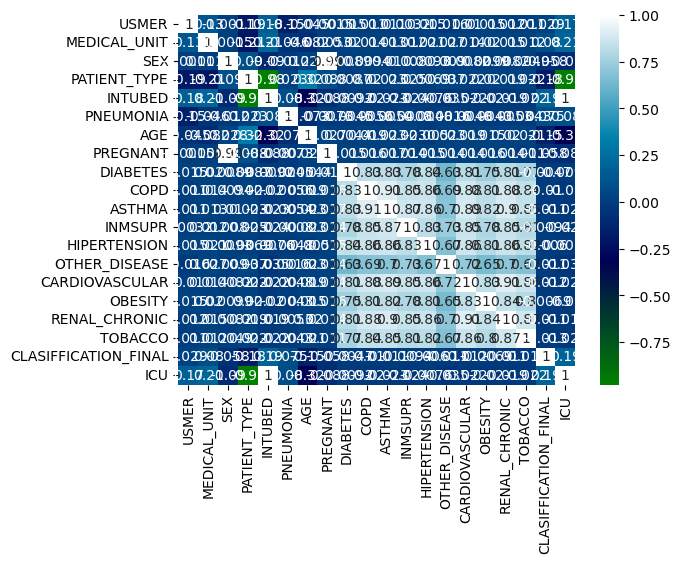

In [33]:
#Data Exploration and EDA
#Visualizing Correlations
#Identifying Patterns 
#Identifying Relationships
#Customization and Visualization
#Data Preprocessing

sns.heatmap(df.corr(),annot=True,cmap='ocean')

<Axes: xlabel='SEX', ylabel='count'>

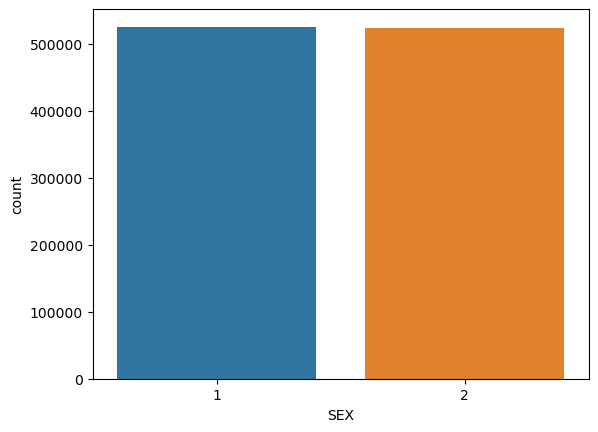

In [34]:
#Visualizing Categorical Data 
#Data Explor
#Data Cleaning and Preprocessing
#Communication Finding 



sns.countplot(x='SEX', data=df)

<Axes: xlabel='AGE', ylabel='count'>

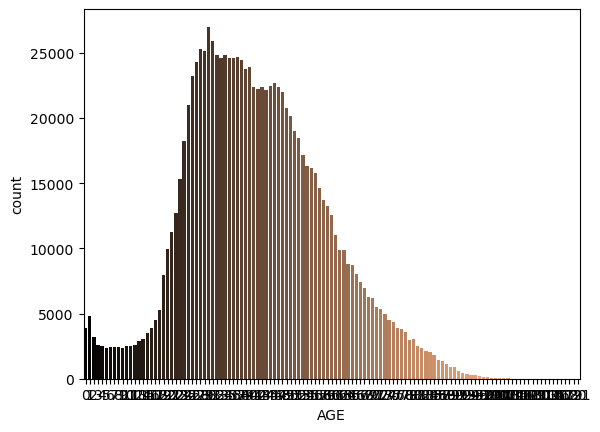

In [35]:
#Visualizing Categorical Data 
#Data Explor
#Data Cleaning and Preprocessing
#Communication Finding 

sns.countplot(x=df['AGE'],palette='copper')

<Axes: xlabel='PATIENT_TYPE', ylabel='count'>

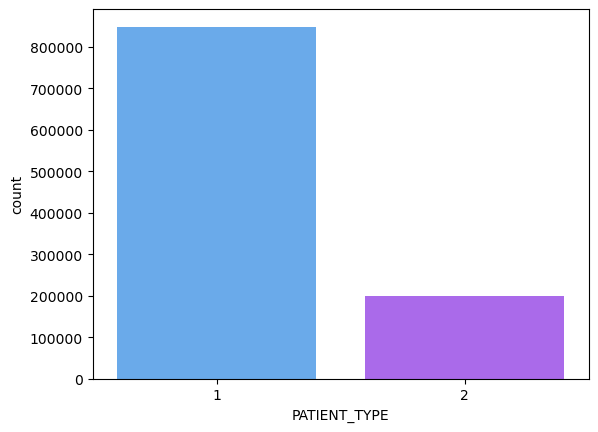

In [36]:
#Visualizing Categorical Data 
#Data Explor
#Data Cleaning and Preprocessing
#Communication Finding 

sns.countplot(x=df['PATIENT_TYPE'],palette='cool')

<Axes: xlabel='MEDICAL_UNIT', ylabel='count'>

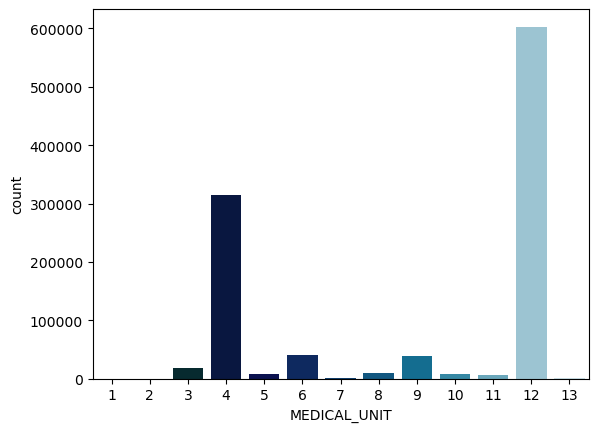

In [37]:
#Visualizing Categorical Data 
#Data Explor
#Data Cleaning and Preprocessing
#Communication Finding 


sns.countplot(x=df['MEDICAL_UNIT'],palette='ocean')

<Axes: xlabel='MEDICAL_UNIT', ylabel='Density'>

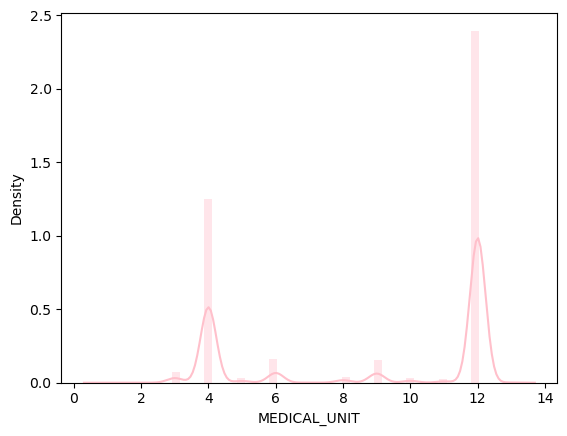

In [38]:
#Data Preprocessing
#Distribution Visualization
#Identifying Multimodal Distributions


sns.distplot(df['MEDICAL_UNIT'],color='pink')

<Axes: xlabel='AGE', ylabel='Density'>

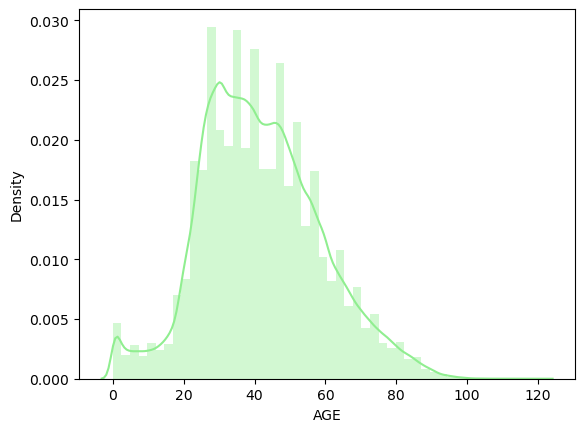

In [39]:
#Data Preprocessing
#Distribution Visualization
#Identifying Multimodal Distributions


sns.distplot(df['AGE'],color='lightgreen')

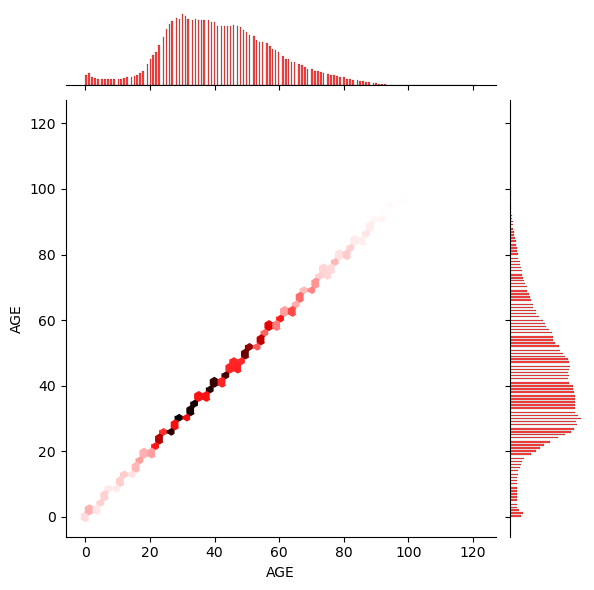

In [40]:
#Customization and Flexibility
#Data Exploration and EDA
#Correlation Analysis:

sns.jointplot(x='AGE',y='AGE',data=df,kind='hex',color='red')

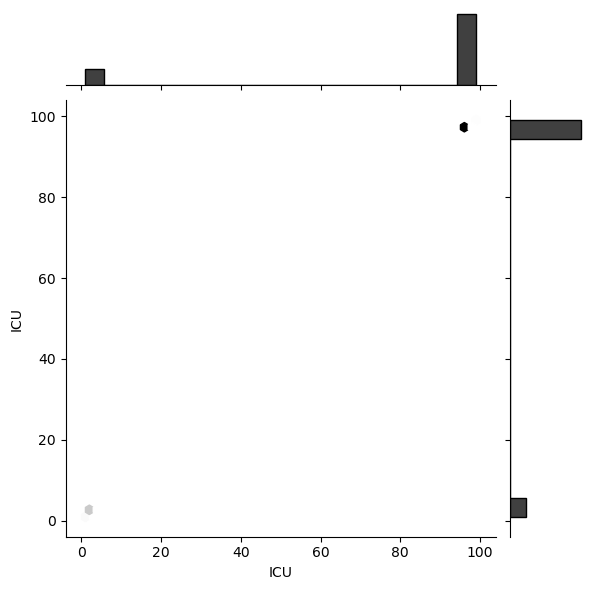

In [41]:
#Customization and Flexibility
#Data Exploration and EDA
#Correlation Analysis:


sns.jointplot(x='ICU',y='ICU',data=df,kind='hex',color='black')

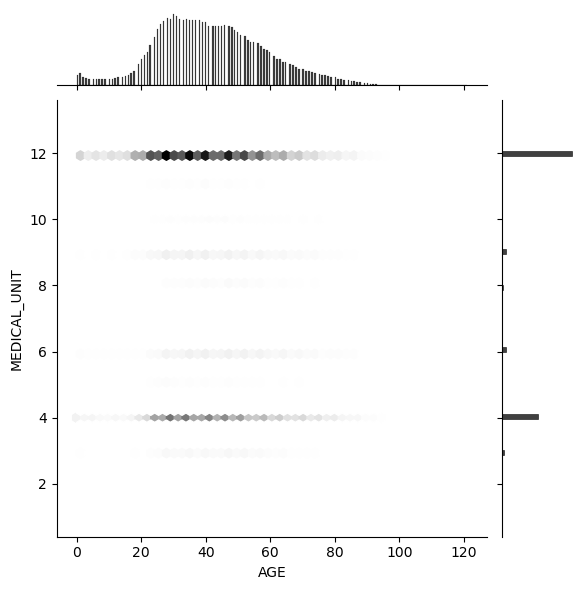

In [42]:
#Customization and Flexibility
#Data Exploration and EDA
#Correlation Analysis:



sns.jointplot(x='AGE',y='MEDICAL_UNIT',data=df,kind='hex',color='black')

<Axes: xlabel='CLASIFFICATION_FINAL'>

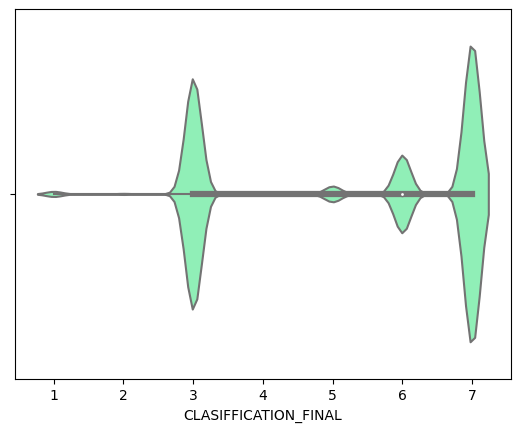

In [43]:
#Visualizing Data Distribution 
# The plot provides insights into the distribution 
#Comparison of Distributions
#Data Preprocessing and Feature Engineering


sns.violinplot(x=df["CLASIFFICATION_FINAL"],palette='rainbow')

<Axes: >

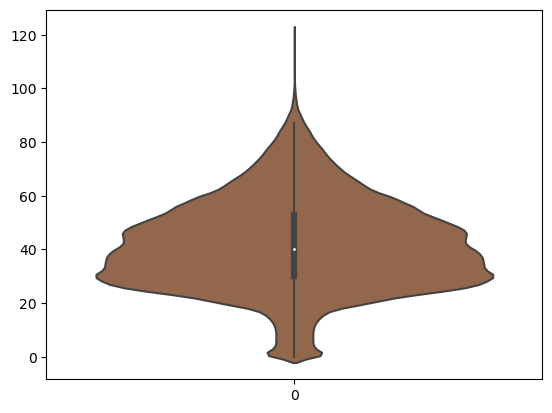

In [44]:
#Visualizing Data Distribution # The plot provides insights into the distribution 
#Comparison of Distributions
#Data Preprocessing and Feature Engineering

sns.violinplot(df["AGE"],palette='copper')

<Axes: >

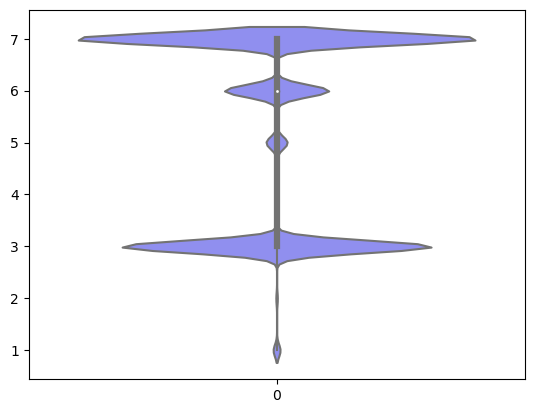

In [45]:
#Visualizing Data Distribution # The plot provides insights into the distribution 
#Comparison of Distributions
#Data Preprocessing and Feature Engineering

sns.violinplot(df["CLASIFFICATION_FINAL"],palette='cool')


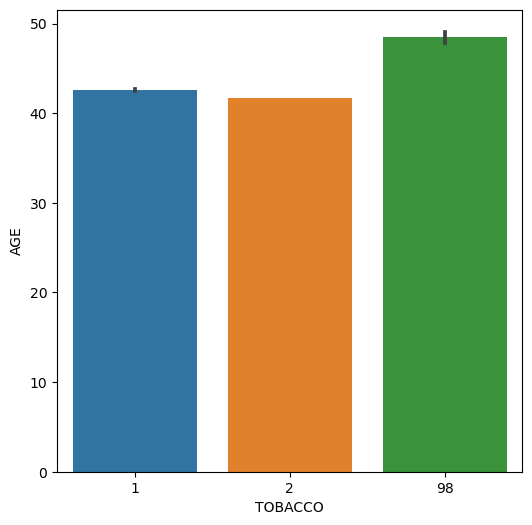

In [64]:
#Visualizing Categorical Data
#Comparing Data Across Categories
#Aggregated Data Representation
#Comparison of Frequency or Count
#Supporting Decision Making 

plt.figure(figsize=(6, 6))
sns.barplot(x='TOBACCO', y='AGE', data=df)
plt.show()

<Axes: xlabel='AGE', ylabel='MEDICAL_UNIT'>

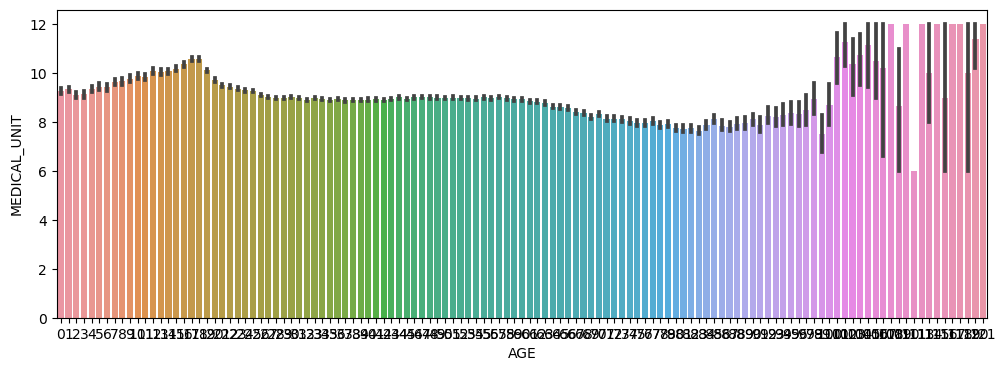

In [47]:
#Visualizing Categorical Data
#Comparing Data Across Categories
#Aggregated Data Representation
#Comparison of Frequency or Count
#Supporting Decision Making 

plt.figure(figsize=(12, 4))
sns.barplot(x='AGE',y='MEDICAL_UNIT',data=df)

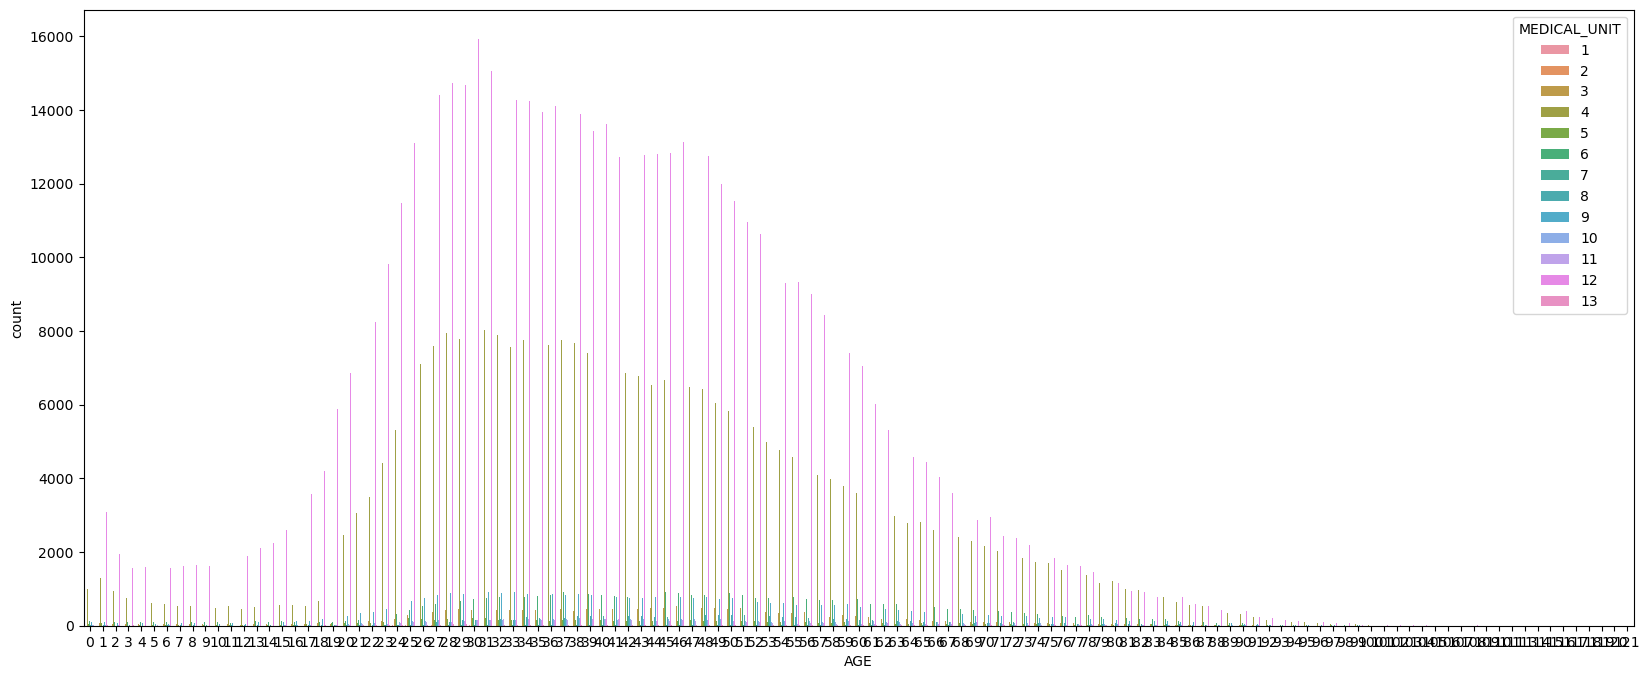

In [48]:

#Visualizing Categorical Data 
#Data Explor
#Data Cleaning and Preprocessing
#Communication Finding 

plt.figure(figsize=(20, 8))
sns.countplot(x='AGE', hue='MEDICAL_UNIT', data=df)
plt.show()


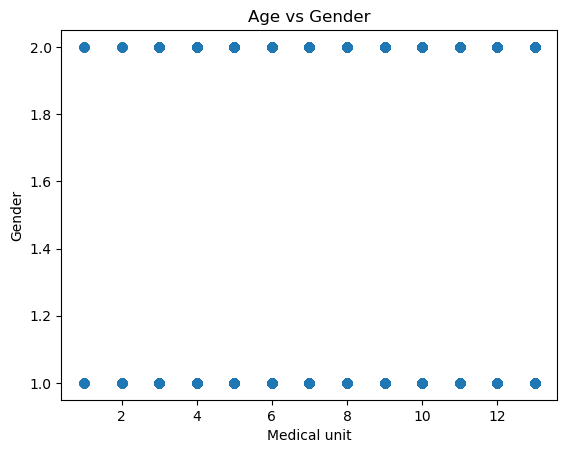

In [60]:
# Generate scatter plot for Medicalunit vs sex

#Correlation Analysis
#Data Preprocessing
#Data Exploration and EDA

plt.scatter(df['MEDICAL_UNIT'], df['SEX'])
plt.xlabel('Medical unit')
plt.ylabel('Gender')
plt.title('Age vs Gender')
plt.show()

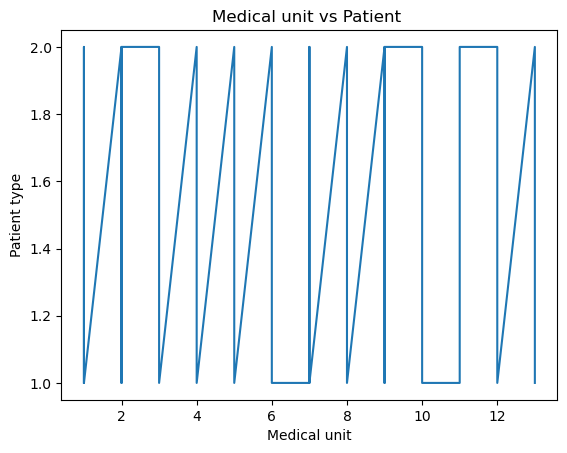

In [61]:
# Generate plot for medical unit vs patient type

#Correlation Analysis
#Data Preprocessing
#Data Exploration and EDA


plt.plot(df['MEDICAL_UNIT'],df['PATIENT_TYPE'])
plt.xlabel('Medical unit')
plt.ylabel('Patient type')
plt.title('Medical unit vs Patient ')
plt.show()

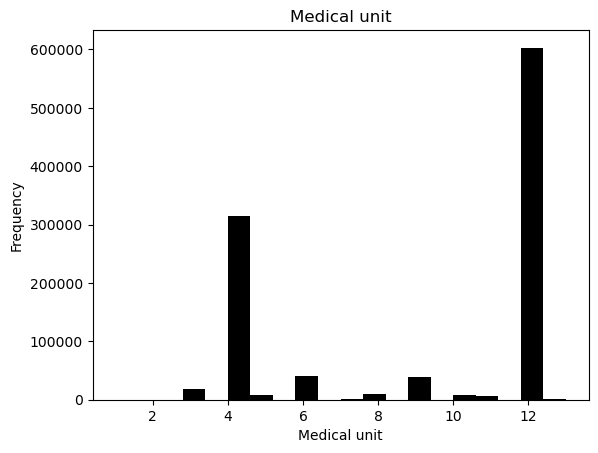

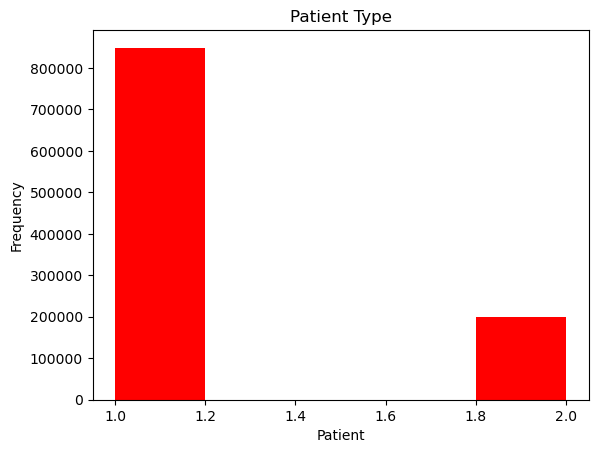

In [63]:
###########################################################
# Generate histogram for MEDICAL
###########################################################

#data analysis (EDA)
#Data Preprocessing
#Comparison between Distributions


plt.hist(df['MEDICAL_UNIT'], bins=20 ,color='black')
plt.xlabel('Medical unit')
plt.ylabel('Frequency')
plt.title('Medical unit')
plt.show()

###########################################################
# Generate histogram for PATIENT
###########################################################

plt.hist(df['PATIENT_TYPE'], bins=5,color='red')
plt.xlabel('Patient')
plt.ylabel('Frequency')
plt.title('Patient Type')
plt.show()

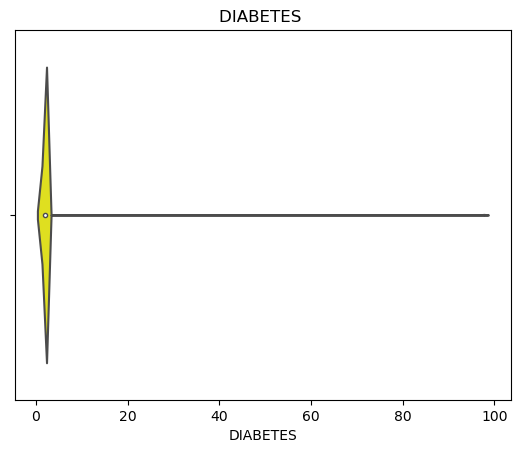

In [52]:

#Visualizing Data Distribution 
#The plot provides insights into the distribution 
#Comparison of Distributions
#Data Preprocessing and Feature Engineering


sns.violinplot(x='DIABETES',data=df,color='yellow')
plt.title('DIABETES ')
plt.show()

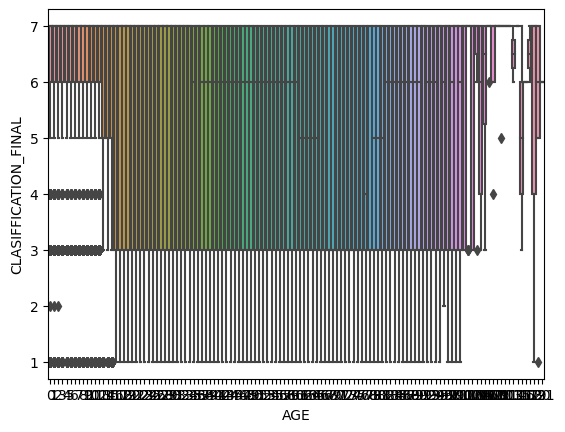

In [53]:

#Summary of Data Distribution
#Comparison of Distributions
#Insights for Decision Making
#Data Preprocessing 



sns.boxplot(x='AGE',y='CLASIFFICATION_FINAL',data=df)
plt.show()

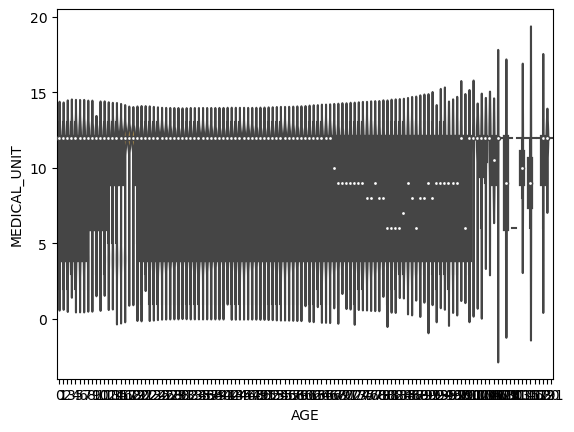

In [54]:

#Visualizing Data Distribution 
#The plot provides insights into the distribution 
#Comparison of Distributions
#Data Preprocessing and Feature Engineering

sns.violinplot(x='AGE',y='MEDICAL_UNIT',data=df)
plt.show()

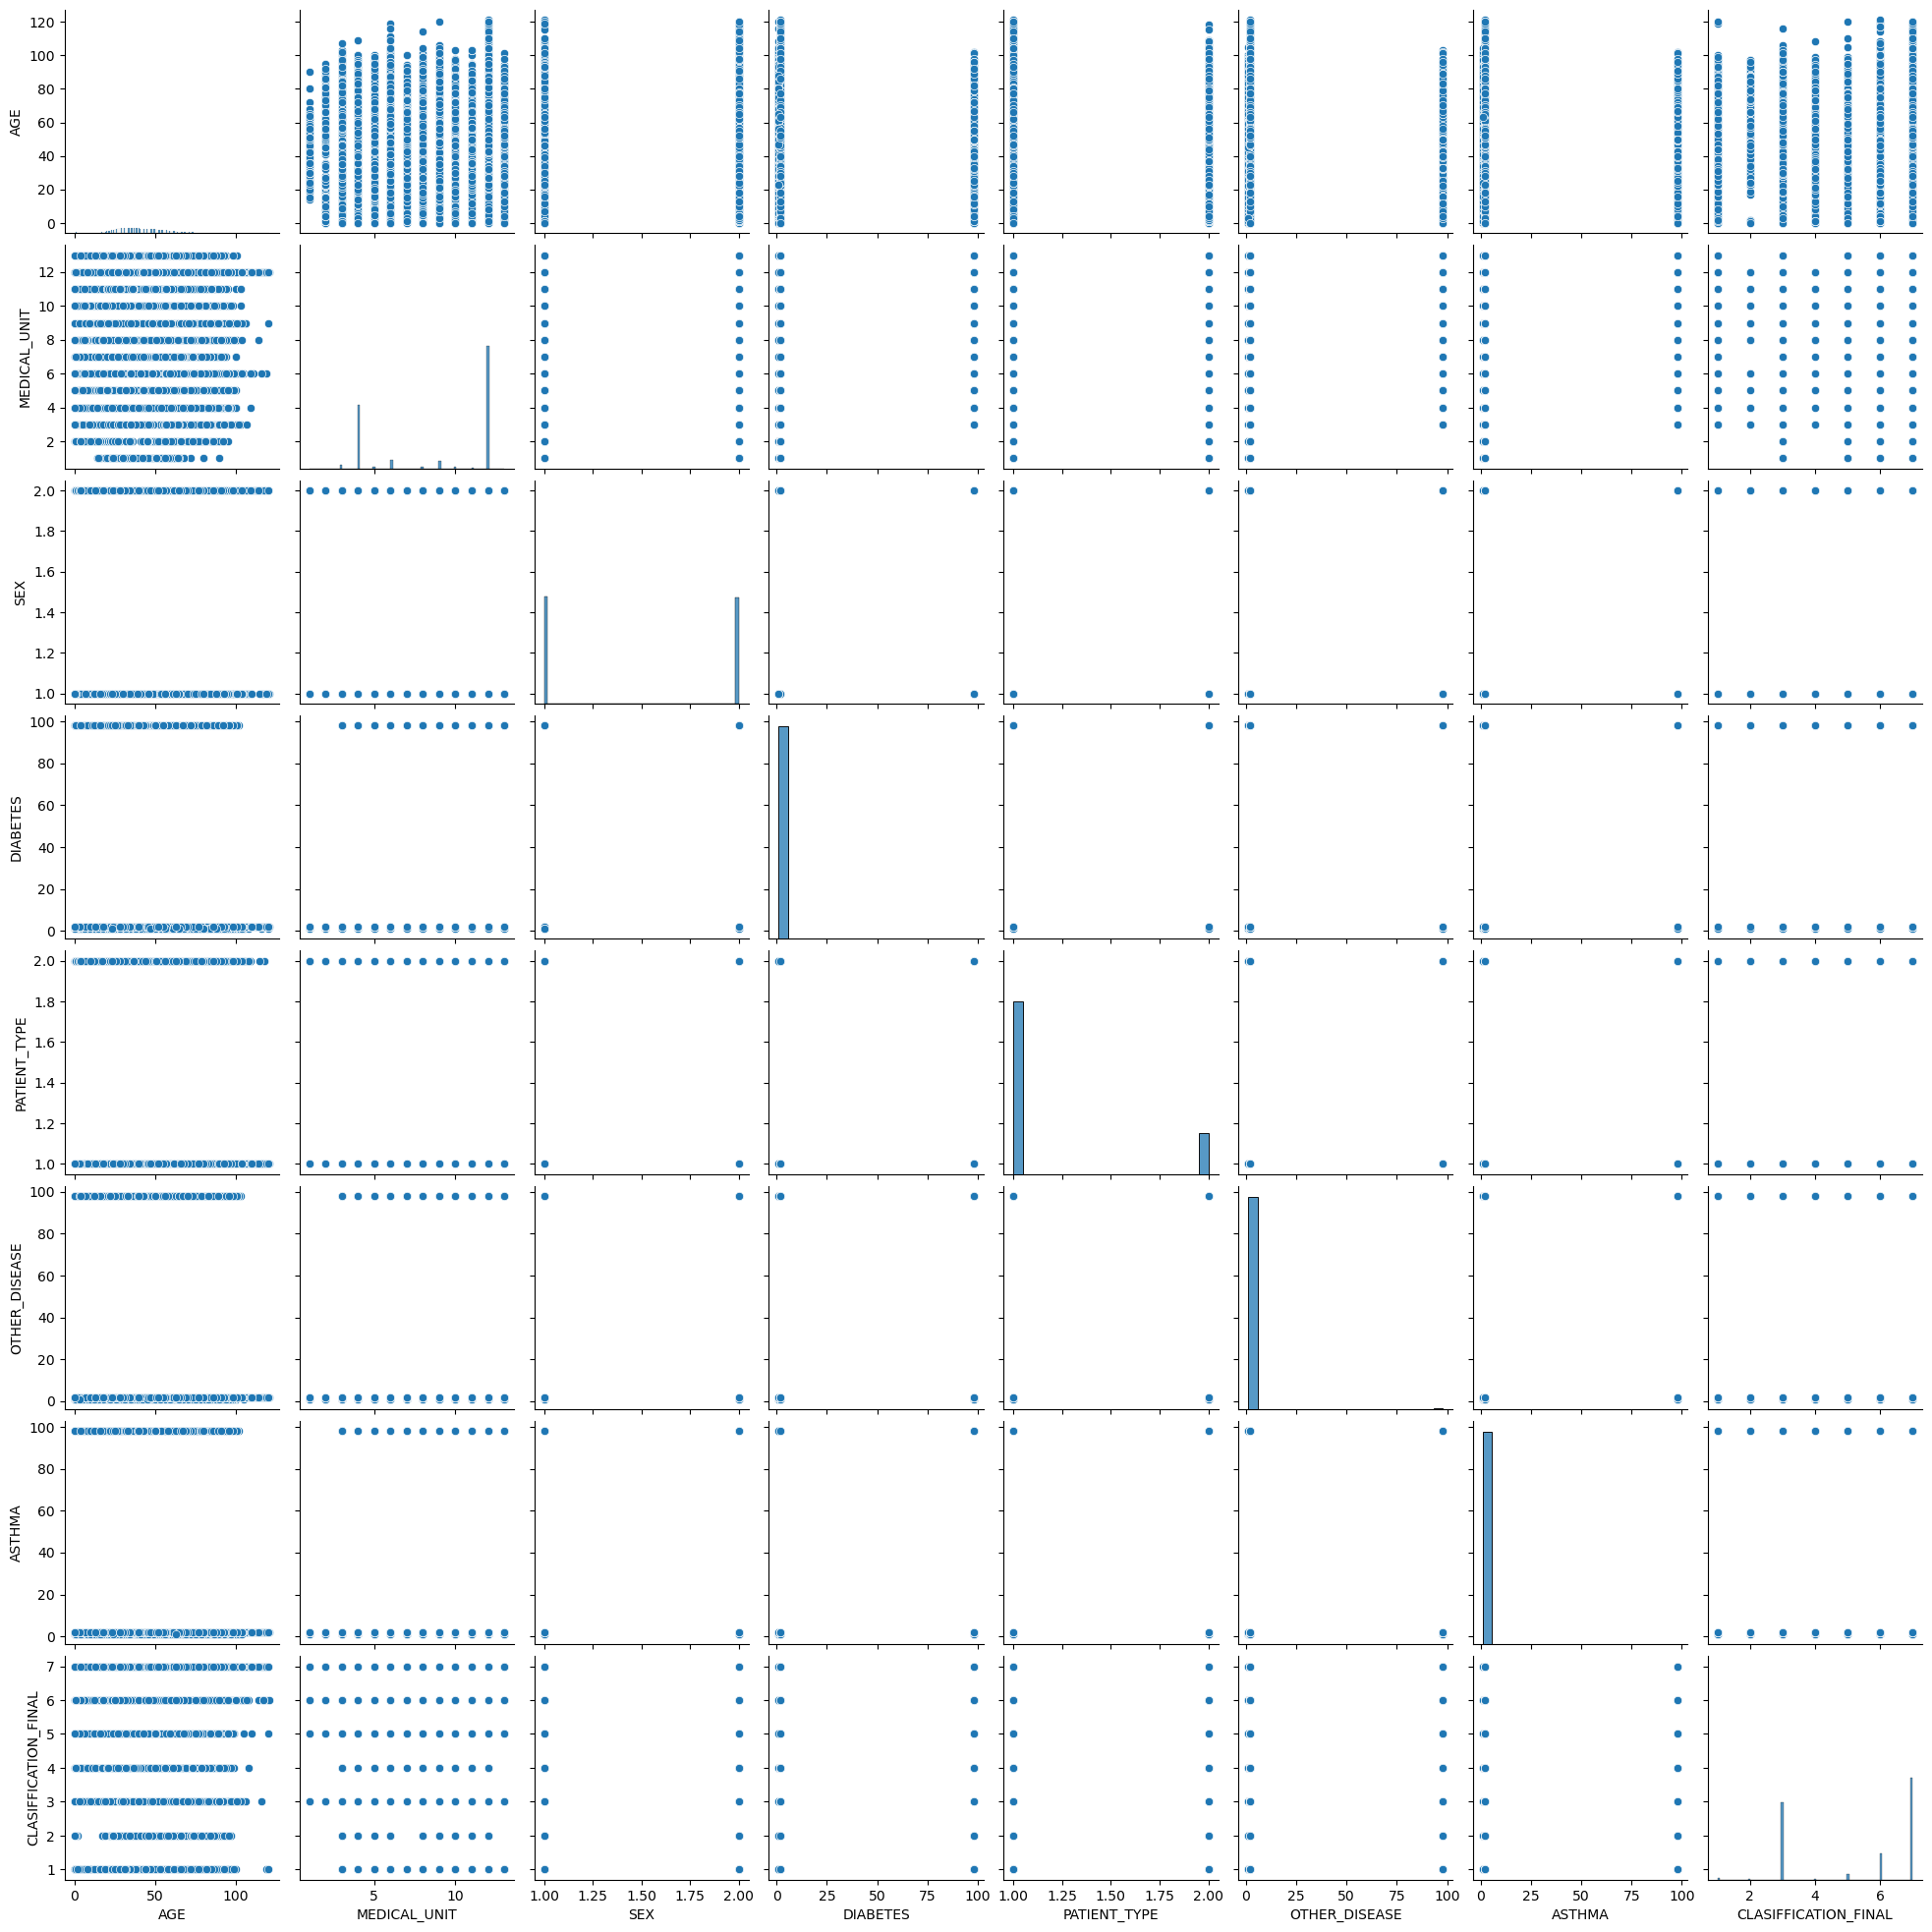

In [55]:
#Correlation Analysis
#Data Exploration and EDA
#Customization and Flexibility

sns.pairplot(df, vars=['AGE', 'MEDICAL_UNIT', 'SEX', 'DIABETES', 'PATIENT_TYPE','OTHER_DISEASE','ASTHMA','CLASIFFICATION_FINAL'])
plt.show()